# EC 412 Machine Learning Innovative Project


## Topic: Dietary Prediction for Patients with Chronic Kidney Disease (CKD) using Hybrid K-means & Multi-Class Classification Algorithms

## Aditya Agrawal 
## 2K17/EC/008

# Importing Libraries

In [1]:
import time

In [2]:
start_code = time.time()

In [3]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [5]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Reading, Preprocessing, Cleaning Dataset

In [6]:
#Readin arff file into pandas dataframe
data = arff.loadarff('chronic_kidney_disease_full.arff')
df = pd.DataFrame(data[0])

In [7]:
print("Shape of dataset=",df.shape)
df.head()

Shape of dataset= (400, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,b'1.020',b'1',b'0',b'?',b'normal',b'notpresent',b'notpresent',121.0,...,44.0,7800.0,5.2,b'yes',b'yes',b'no',b'good',b'no',b'no',b'ckd'
1,7.0,50.0,b'1.020',b'4',b'0',b'?',b'normal',b'notpresent',b'notpresent',NaN,...,38.0,6000.0,NaN,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'
2,62.0,80.0,b'1.010',b'2',b'3',b'normal',b'normal',b'notpresent',b'notpresent',423.0,...,31.0,7500.0,NaN,b'no',b'yes',b'no',b'poor',b'no',b'yes',b'ckd'
3,48.0,70.0,b'1.005',b'4',b'0',b'normal',b'abnormal',b'present',b'notpresent',117.0,...,32.0,6700.0,3.9,b'yes',b'no',b'no',b'poor',b'yes',b'yes',b'ckd'
4,51.0,80.0,b'1.010',b'2',b'0',b'normal',b'normal',b'notpresent',b'notpresent',106.0,...,35.0,7300.0,4.6,b'no',b'no',b'no',b'good',b'no',b'no',b'ckd'


In [8]:
print("Features in Dataset:-\n")
for col in df.columns:
    print(col)

Features in Dataset:-

age
bp
sg
al
su
rbc
pc
pcc
ba
bgr
bu
sc
sod
pot
hemo
pcv
wbcc
rbcc
htn
dm
cad
appet
pe
ane
class


In [9]:
#Defining Different Types of Columns
numeric_col = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
nominal_col = ['sg','al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
target_col = 'class'

## Replacing Nan values with mean for numeric columns

In [10]:
for col in numeric_col:
    mean_val=df[col].mean(skipna = True)
    for i in df.index:
        if math.isnan(df[col].iloc[i]):
            df.at[i,col]=mean_val

In [11]:
print("Dataset after Replacing Nan values with mean for numeric columns: -")
df[numeric_col].head()

Dataset after Replacing Nan values with mean for numeric columns: -


,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,48.0,80.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200000
1,7.0,50.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,4.707435
2,62.0,80.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,4.707435
3,48.0,70.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000
4,51.0,80.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600000


## Dealing with NAN values for nominal columns and Converting to Integers

### Method: Replace b'?' with mode values and then convert to integers.

In [12]:
#Replace b'?' with mode values
for col in nominal_col:
    df[col] = df[col].replace(b'?',df[col].mode()[0])

In [13]:
#Convert all values to integers
df['sg'] = df['sg'].astype(float)
df[['al','su']] = df[['al','su']].astype(int) 
df[['rbc','pc']] = df[['rbc','pc']].replace(to_replace={b'abnormal':1,b'normal':0})
df[['pcc','ba']] = df[['pcc','ba']].replace(to_replace={b'present':1,b'notpresent':0})
df[['htn','dm','cad','pe','ane']] = df[['htn','dm','cad','pe','ane']].replace(to_replace={b'yes':1,b'no':0})
df[['appet']] = df[['appet']].replace(to_replace={b'good':1,b'poor':0})

In [14]:
print("Dataset after Dealing with NAN values for nominal columns and Converting to Integers: -")
df[nominal_col].head()

Dataset after Dealing with NAN values for nominal columns and Converting to Integers: -


,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,1.020,1,0,0,0,0,0,1,1,0,1,0,0
1,1.020,4,0,0,0,0,0,0,0,0,1,0,0
2,1.010,2,3,0,0,0,0,0,1,0,0,0,1
3,1.005,4,0,0,1,1,0,1,0,0,0,1,1
4,1.010,2,0,0,0,0,0,0,0,0,1,0,0


# Dealing with target columns and creating new attribute

In [15]:
print("Values counts of 'class' column=")
print(df[target_col].value_counts())

Values counts of 'class' column=
b'ckd'       250
b'notckd'    150
Name: class, dtype: int64


In [16]:
#Replace 'Class' column with integers
df[target_col] = df[target_col].replace(to_replace={b'ckd':1,b'notckd':0})

In [17]:
print("Values counts of 'class' column=")
print(df[target_col].value_counts())

Values counts of 'class' column=
1    250
0    150
Name: class, dtype: int64


In [18]:
#Defining Dictionary of Diet
diet = {"Low":0,"Safe":1,"Caution":2,"Danger":3}

In [19]:
#Creating new Attribute of Diet
for i in df.index:
    if (df.at[i,"pot"]<3.5 and df.at[i,"pot"]>0):
        df.at[i,"diet"]=diet["Low"] 
    elif (df.at[i,"pot"]<=5.0 and df.at[i,"pot"]>=3.5):
        df.at[i,"diet"]=diet["Safe"] 
    elif (df.at[i,"pot"]<=6.0 and df.at[i,"pot"]>5.0):
        df.at[i,"diet"]=diet["Caution"] 
    elif (df.at[i,"pot"]>6):
        df.at[i,"diet"]=diet["Danger"] 
df['diet'] = df['diet'].astype(int)

In [20]:
df[["pot","class","diet"]].head()

,pot,class,diet
0,4.627244,1,1
1,4.627244,1,1
2,4.627244,1,1
3,2.500000,1,0
4,4.627244,1,1


In [21]:
#Reversing key and values of diet dicitonary
diet = {v: k for k, v in diet.items()}

# X and y split

In [22]:
#Defining feature columns and target columns
features_col = numeric_col + nominal_col + ['class']
target_col = 'diet'

In [23]:
#Splitting feature variable X and target variable y
X = df[features_col]
y = df[target_col]

In [24]:
print("Columns in feature variable X:-")
X.columns

Columns in feature variable X:-


Index(['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
       'rbcc', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')

In [25]:
print("Shape of X=",X.shape)

Shape of X= (400, 25)


In [26]:
print("Values counts of target variables=")
y.value_counts()

Values counts of target variables=


1    344
2     26
0     20
3     10
Name: diet, dtype: int64

In [27]:
print("Shape of target variable y=",y.shape)

Shape of target variable y= (400,)


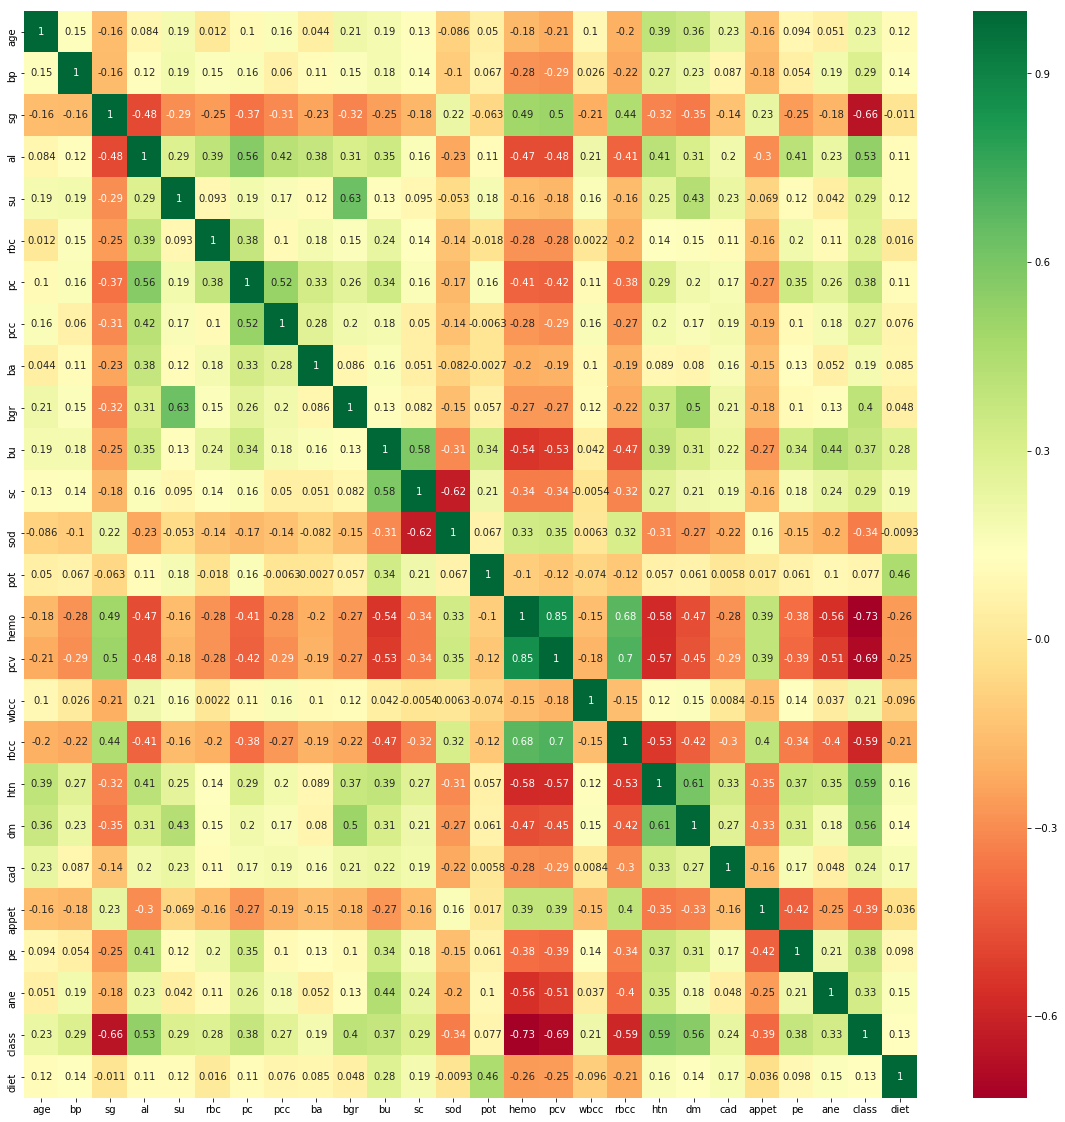

In [28]:
#get correlations of each features in dataset
corrmat = df.corr()
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [29]:
#Extracting Top Features from heatmap
l = abs(corrmat[target_col])
index = l.nlargest(n = 7)  
top_features = list(index[2:7].index.values) 

In [30]:
print("Top features=")
top_features

Top features=


['bu', 'hemo', 'pcv', 'rbcc', 'sc']

In [31]:
#Using only top features of X
X = df[top_features]

In [32]:
print("Columns in feature variable X:-")
X.columns

Columns in feature variable X:-


Index(['bu', 'hemo', 'pcv', 'rbcc', 'sc'], dtype='object')

In [33]:
print("Shape of X=",X.shape)

Shape of X= (400, 5)


# Classification

In [34]:
#Defining dictionaries for saving results

#Accuracy
tot_acc ={"DT":[],"NB":[],"RF":[],"LR":[],"kNN":[]}
mean_acc ={"DT":0,"NB":0,"RF":0,"LR":0,"kNN":0}

#Confusion Matrix
tot_cm = {"DT":[],"NB":[],"RF":[],"LR":[],"kNN":[]}
mean_cm = {"DT":0,"NB":0,"RF":0,"LR":0,"kNN":0}

#Precision
tot_prec ={"DT":[],"NB":[],"RF":[],"LR":[],"kNN":[]}
mean_prec ={"DT":0,"NB":0,"RF":0,"LR":0,"kNN":0}

#Recall
tot_rec ={"DT":[],"NB":[],"RF":[],"LR":[],"kNN":[]}
mean_rec ={"DT":0,"NB":0,"RF":0,"LR":0,"kNN":0}

#F-score
tot_F ={"DT":[],"NB":[],"RF":[],"LR":[],"kNN":[]}
mean_F ={"DT":0,"NB":0,"RF":0,"LR":0,"kNN":0}

#Time taken for model run
time_dict = {"DT":0,"NB":0,"RF":0,"LR":0,"kNN":0}

## Decision Tree 

In [35]:
start_time = time.time()

In [36]:
# Creating Model
Tree = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
kf = KFold(n_splits = 10, shuffle = True)

In [37]:
for i in range(10):
    
    #K-Fold Split
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    
    Tree = Tree.fit(X_train, y_train)
    
    y_predicted=Tree.predict(X_test)
    
    tot_acc["DT"].append(round(accuracy_score(y_test, y_predicted)*100,4))
    
    cm=confusion_matrix (y_test, y_predicted)
    shape = np.shape(cm)
    padded_array = np.zeros((4, 4))
    padded_array[:shape[0],:shape[1]] = cm
    tot_cm["DT"].append(padded_array)
    
    prf = precision_recall_fscore_support(y_test, y_predicted, average='micro')
    
    tot_prec["DT"].append(round(prf[0],4))
    tot_rec["DT"].append(round(prf[1],4))
    tot_F["DT"].append(round(prf[2],4))

mean_acc["DT"]=sum(tot_acc["DT"])/len(tot_acc["DT"])
mean_cm["DT"]=sum(tot_cm["DT"])/len(tot_cm["DT"])
  
mean_prec["DT"]=sum(tot_prec["DT"])/len(tot_prec["DT"])
mean_rec["DT"]=sum(tot_rec["DT"])/len(tot_rec["DT"])
mean_F["DT"]=sum(tot_F["DT"])/len(tot_F["DT"])
    

In [38]:
time_dict["DT"] = str(time.time() - start_time) + " seconds"

In [39]:
print('Accuracy from each Iteration: ', tot_acc["DT"])
print('\nAverage K-Fold Accuracy :' , mean_acc["DT"])

print('\nPrecision from each Iteration: ', tot_prec["DT"])
print('\nAverage K-Fold Precision :' , mean_prec["DT"])

print('\nRecall from each Iteration: ', tot_rec["DT"])
print('\nAverage K-Fold Recall :' , mean_rec["DT"])

print('\nF_Score from each Iteration: ', tot_F["DT"])
print('\nAverage K-Fold F_Score :' , mean_F["DT"])

Accuracy from each Iteration:  [62.5, 80.0, 70.0, 80.0, 72.5, 75.0, 80.0, 70.0, 70.0, 90.0]

Average K-Fold Accuracy : 75.0

Precision from each Iteration:  [0.625, 0.8, 0.7, 0.8, 0.725, 0.75, 0.8, 0.7, 0.7, 0.9]

Average K-Fold Precision : 0.7500000000000001

Recall from each Iteration:  [0.625, 0.8, 0.7, 0.8, 0.725, 0.75, 0.8, 0.7, 0.7, 0.9]

Average K-Fold Recall : 0.7500000000000001

F_Score from each Iteration:  [0.625, 0.8, 0.7, 0.8, 0.725, 0.75, 0.8, 0.7, 0.7, 0.9]

Average K-Fold F_Score : 0.7500000000000001


In [40]:
print('Confusion Matrix from each Iteration: ', *tot_cm["DT"],sep='\n\n')

Confusion Matrix from each Iteration: 

[[ 0.  3.  0.  0.]
 [ 2. 21.  4.  2.]
 [ 0.  3.  2.  0.]
 [ 0.  0.  1.  2.]]

[[ 0.  2.  1.  0.]
 [ 1. 31.  0.  0.]
 [ 0.  4.  0.  0.]
 [ 0.  0.  0.  1.]]

[[ 0.  2.  0.  0.]
 [ 2. 27.  4.  1.]
 [ 0.  2.  1.  0.]
 [ 0.  1.  0.  0.]]

[[ 0.  0.  0.  0.]
 [ 2. 31.  4.  0.]
 [ 0.  2.  1.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  1.  0.  0.]
 [ 2. 28.  2.  0.]
 [ 2.  3.  0.  0.]
 [ 0.  1.  0.  1.]]

[[ 0.  2.  1.  0.]
 [ 2. 29.  1.  0.]
 [ 0.  4.  0.  0.]
 [ 0.  0.  0.  1.]]

[[ 0.  1.  0.  0.]
 [ 3. 31.  1.  0.]
 [ 1.  1.  1.  1.]
 [ 0.  0.  0.  0.]]

[[ 1.  2.  0.  0.]
 [ 1. 26.  3.  0.]
 [ 1.  3.  0.  0.]
 [ 0.  2.  0.  1.]]

[[ 0.  1.  2.  0.]
 [ 2. 27.  5.  0.]
 [ 0.  2.  1.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 35.  0.  1.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  1.]]


In [41]:
print('Average Confusion Matrix :\n' , mean_cm["DT"])

Average Confusion Matrix :
 [[ 0.1  1.6  0.4  0. ]
 [ 1.7 28.6  2.4  0.4]
 [ 0.4  2.5  0.6  0.1]
 [ 0.   0.4  0.1  0.7]]


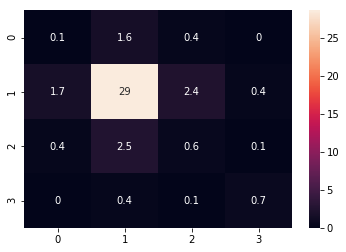

In [42]:
sns.heatmap(mean_cm["DT"],annot=True)
plt.show()

In [43]:
print('Class labels known to the classifier--', Tree.classes_)

Class labels known to the classifier-- [0 1 2 3]


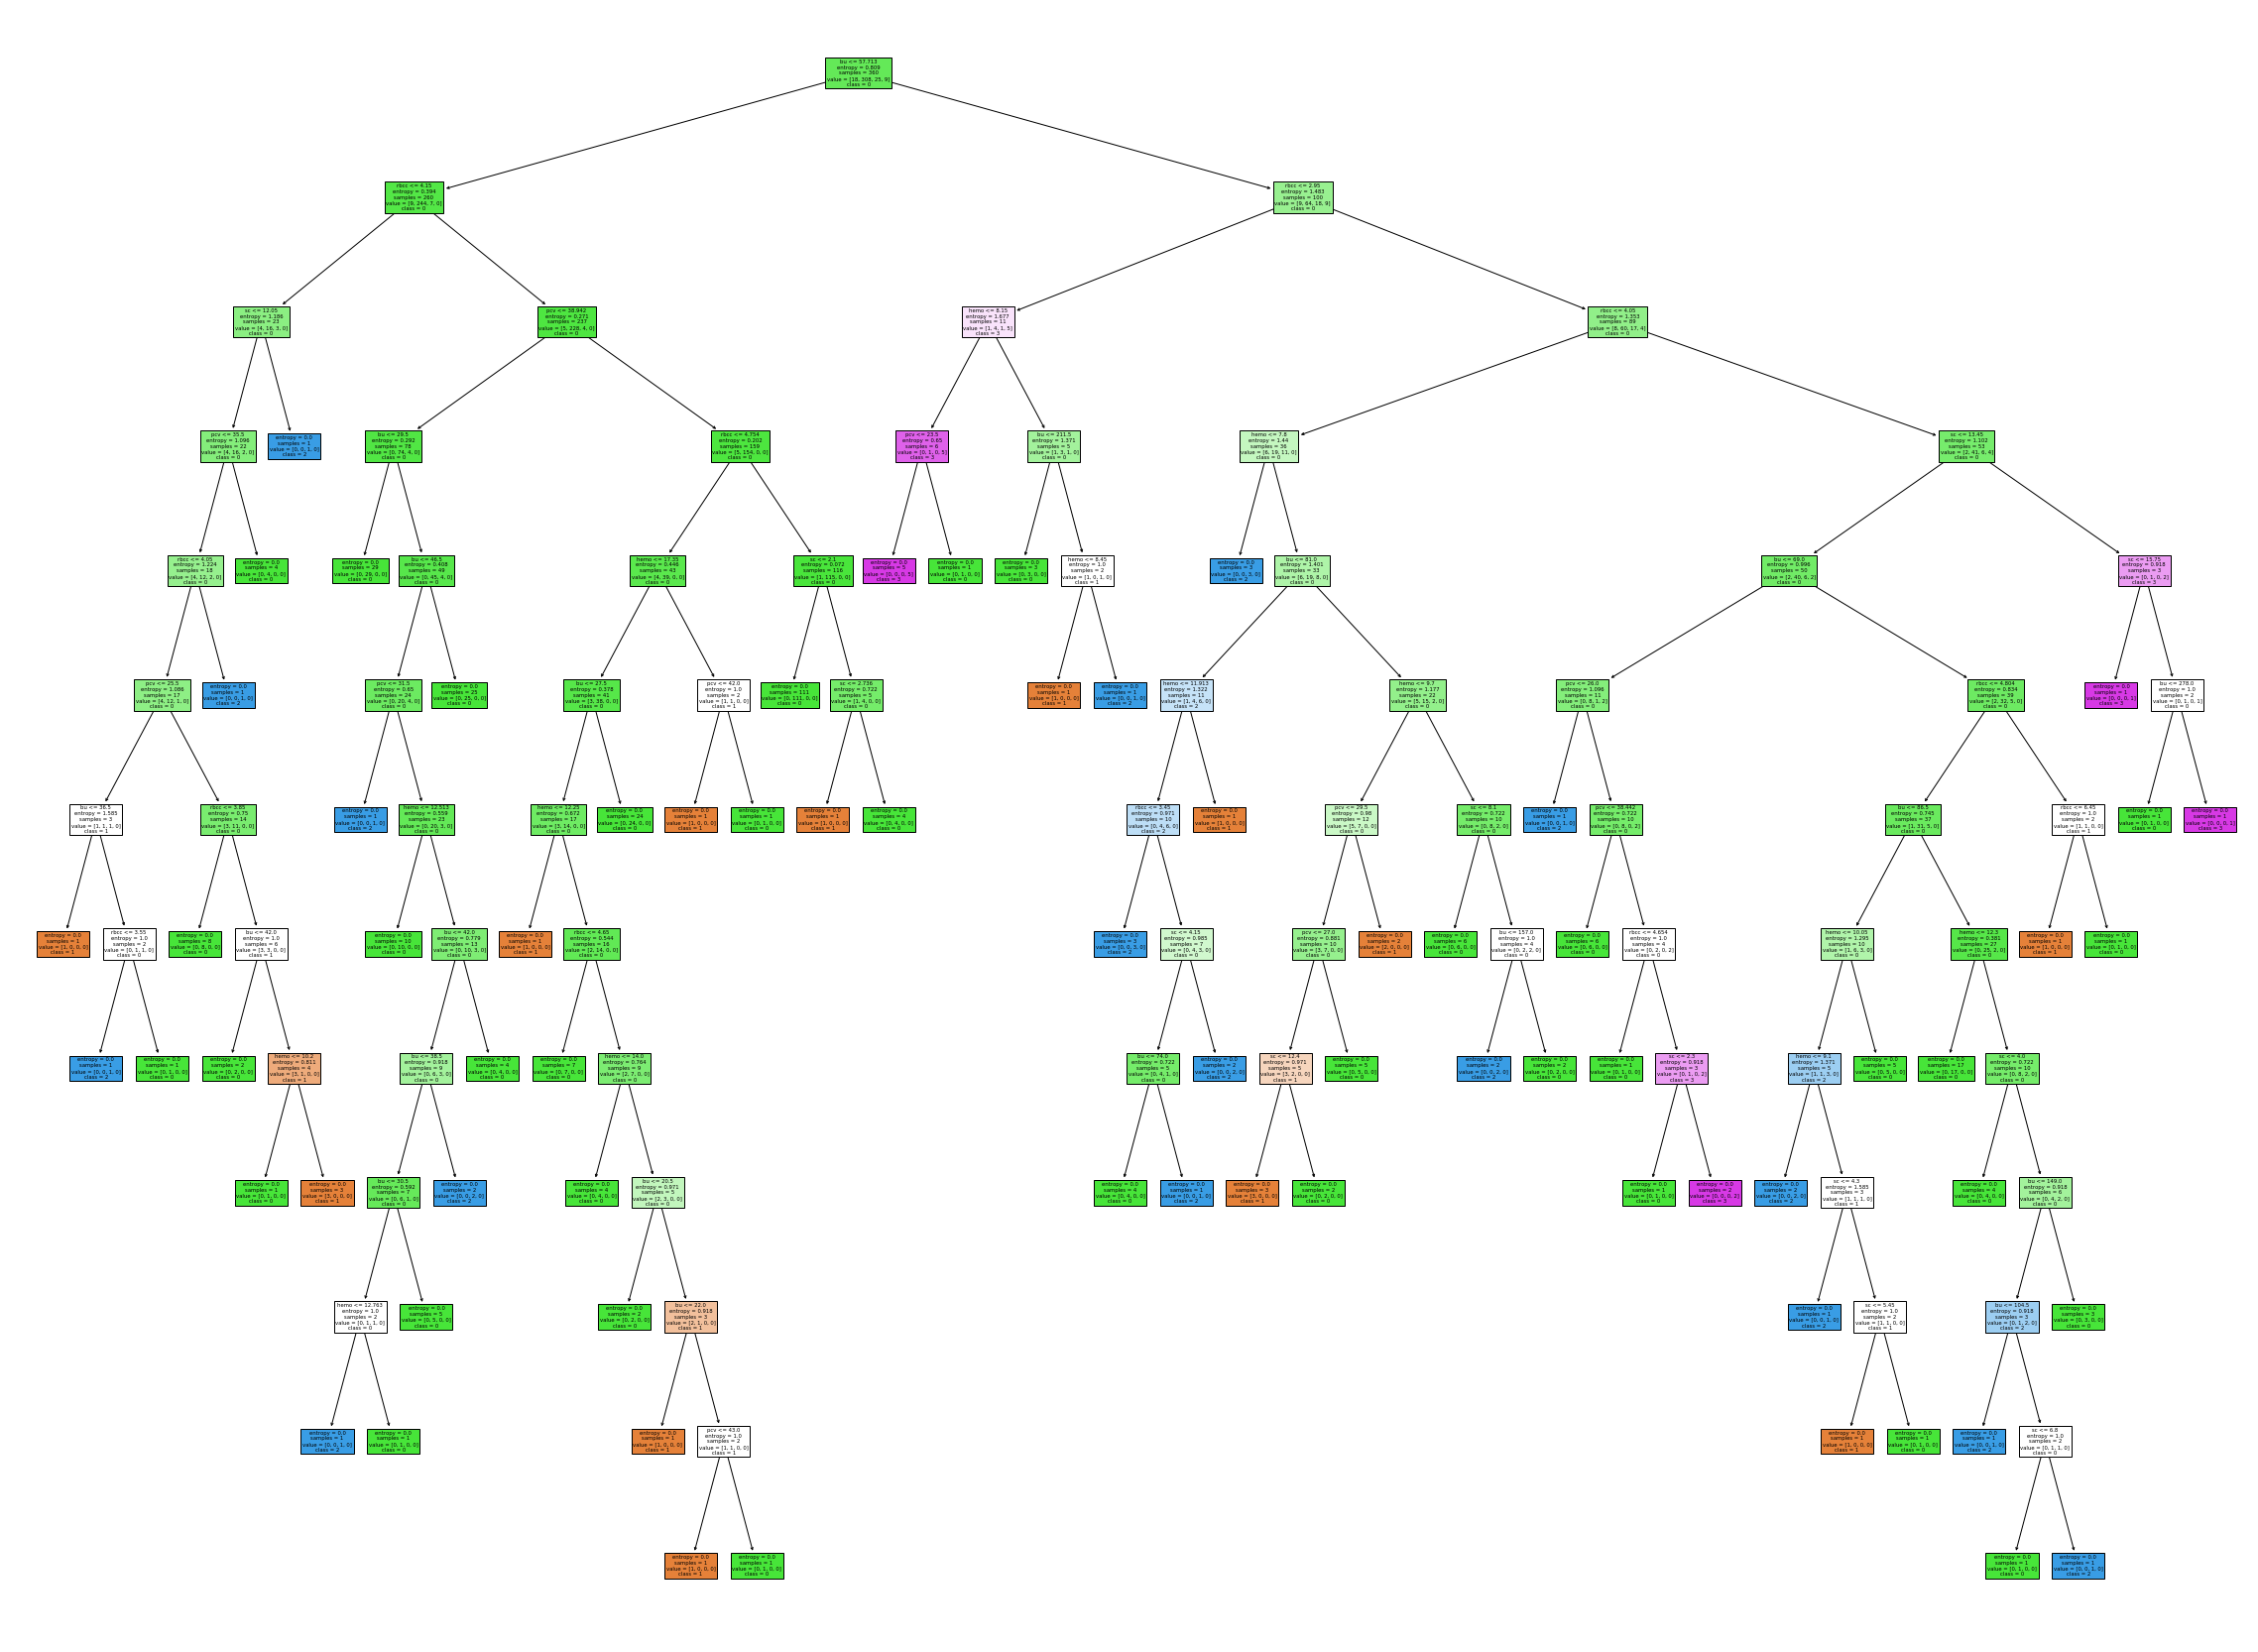

In [44]:
#Plotting the Decision Tree
plt.figure(figsize=(40,30))

a=y.unique()   #Unique Label Names of Species #df.diet
a=a.astype(str)

tree.plot_tree(Tree,feature_names=X.columns,class_names=a,filled=True,rounded=False)

plt.show()

## Naive Bayes

In [45]:
start_time = time.time()

In [46]:
# Creating Model
model=GaussianNB ()
kf = KFold(n_splits = 10, shuffle = True)

In [47]:
for i in range(10):
    
    #K-Fold Split
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    
    model = model.fit(X_train, y_train)
    
    y_predicted=model.predict(X_test)
    
    tot_acc["NB"].append(round(accuracy_score(y_test, y_predicted)*100,4))
    
    cm=confusion_matrix (y_test, y_predicted)
    shape = np.shape(cm)
    padded_array = np.zeros((4, 4))
    padded_array[:shape[0],:shape[1]] = cm
    tot_cm["NB"].append(padded_array)
    
    prf = precision_recall_fscore_support(y_test, y_predicted, average='micro')
    
    tot_prec["NB"].append(round(prf[0],4))
    tot_rec["NB"].append(round(prf[1],4))
    tot_F["NB"].append(round(prf[2],4))

mean_acc["NB"]=sum(tot_acc["NB"])/len(tot_acc["NB"])
mean_cm["NB"]=sum(tot_cm["NB"])/len(tot_cm["NB"])
    
mean_prec["NB"]=sum(tot_prec["NB"])/len(tot_prec["NB"])
mean_rec["NB"]=sum(tot_rec["NB"])/len(tot_rec["NB"])
mean_F["NB"]=sum(tot_F["NB"])/len(tot_F["NB"])
    

In [48]:
time_dict["NB"] = str(time.time() - start_time) + " seconds"

In [49]:
print('Accuracy from each Iteration: ', tot_acc["NB"])
print('\nAverage K-Fold Accuracy :' , mean_acc["NB"])

print('\nPrecision from each Iteration: ', tot_prec["NB"])
print('\nAverage K-Fold Precision :' , mean_prec["NB"])

print('\nRecall from each Iteration: ', tot_rec["NB"])
print('\nAverage K-Fold Recall :' , mean_rec["NB"])

print('\nF_Score from each Iteration: ', tot_F["NB"])
print('\nAverage K-Fold F_Score :' , mean_F["NB"])

Accuracy from each Iteration:  [75.0, 72.5, 85.0, 85.0, 77.5, 85.0, 82.5, 70.0, 80.0, 85.0]

Average K-Fold Accuracy : 79.75

Precision from each Iteration:  [0.75, 0.725, 0.85, 0.85, 0.775, 0.85, 0.825, 0.7, 0.8, 0.85]

Average K-Fold Precision : 0.7975

Recall from each Iteration:  [0.75, 0.725, 0.85, 0.85, 0.775, 0.85, 0.825, 0.7, 0.8, 0.85]

Average K-Fold Recall : 0.7975

F_Score from each Iteration:  [0.75, 0.725, 0.85, 0.85, 0.775, 0.85, 0.825, 0.7, 0.8, 0.85]

Average K-Fold F_Score : 0.7975


In [50]:
print('Confusion Matrix from each Iteration: ', *tot_cm["NB"],sep='\n\n')

Confusion Matrix from each Iteration: 

[[ 0.  2.  2.  2.]
 [ 0. 28.  1.  0.]
 [ 0.  3.  2.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  2.  1.  0.]
 [ 0. 27.  4.  1.]
 [ 0.  2.  2.  0.]
 [ 0.  0.  1.  0.]]

[[ 0.  1.  1.  0.]
 [ 0. 33.  2.  1.]
 [ 1.  0.  1.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  1.  0.  0.]
 [ 0. 31.  2.  1.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  1.  2.]]

[[ 0.  4.  0.  0.]
 [ 0. 30.  1.  0.]
 [ 1.  1.  1.  1.]
 [ 0.  1.  0.  0.]]

[[ 0.  0.  0.  1.]
 [ 0. 34.  3.  2.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  0.  0.  0.]
 [ 1. 32.  3.  2.]
 [ 1.  0.  1.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  1.  0.  0.]
 [ 1. 28.  3.  2.]
 [ 1.  4.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  1.  1.  0.]
 [ 0. 30.  2.  2.]
 [ 0.  2.  2.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  1.  0.  0.]
 [ 0. 33.  2.  1.]
 [ 0.  2.  1.  0.]
 [ 0.  0.  0.  0.]]


In [51]:
print('Average Confusion Matrix :\n' , mean_cm["NB"])

Average Confusion Matrix :
 [[ 0.   1.3  0.5  0.3]
 [ 0.2 30.6  2.3  1.2]
 [ 0.4  1.4  1.1  0.1]
 [ 0.   0.2  0.2  0.2]]


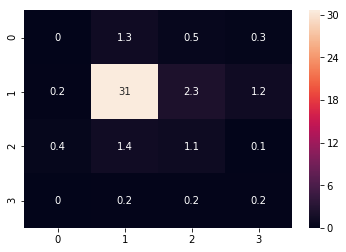

In [52]:
sns.heatmap(mean_cm["NB"],annot=True)
plt.show()

In [53]:
print('Class labels known to the classifier--', model.classes_)

Class labels known to the classifier-- [0 1 2 3]


## Random Forest

In [54]:
start_time = time.time()

In [55]:
# Creating Model
Model = RandomForestClassifier(random_state=0,n_estimators=50,criterion='entropy')
kf = KFold(n_splits = 10, shuffle = True)

In [56]:
for i in range(10):
    
    #K-Fold Split
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    
    Model = Model.fit(X_train, y_train)
    
    y_predicted=Model.predict(X_test)
    
    tot_acc["RF"].append(round(accuracy_score(y_test, y_predicted)*100,4))
    
    cm=confusion_matrix (y_test, y_predicted)
    shape = np.shape(cm)
    padded_array = np.zeros((4, 4))
    padded_array[:shape[0],:shape[1]] = cm
    tot_cm["RF"].append(padded_array)
    
    prf = precision_recall_fscore_support(y_test, y_predicted, average='micro')
    
    tot_prec["RF"].append(round(prf[0],4))
    tot_rec["RF"].append(round(prf[1],4))
    tot_F["RF"].append(round(prf[2],4))

mean_acc["RF"]=sum(tot_acc["RF"])/len(tot_acc["RF"])
mean_cm["RF"]=sum(tot_cm["RF"])/len(tot_cm["RF"])
    
mean_prec["RF"]=sum(tot_prec["RF"])/len(tot_prec["RF"])
mean_rec["RF"]=sum(tot_rec["RF"])/len(tot_rec["RF"])
mean_F["RF"]=sum(tot_F["RF"])/len(tot_F["RF"])
    

In [57]:
time_dict["RF"] = str(time.time() - start_time) + " seconds"

In [58]:
print('Accuracy from each Iteration: ', tot_acc["RF"])
print('\nAverage K-Fold Accuracy :' , mean_acc["RF"])

print('\nPrecision from each Iteration: ', tot_prec["RF"])
print('\nAverage K-Fold Precision :' , mean_prec["RF"])

print('\nRecall from each Iteration: ', tot_rec["RF"])
print('\nAverage K-Fold Recall :' , mean_rec["RF"])

print('\nF_Score from each Iteration: ', tot_F["RF"])
print('\nAverage K-Fold F_Score :' , mean_F["RF"])

Accuracy from each Iteration:  [85.0, 82.5, 82.5, 95.0, 92.5, 80.0, 87.5, 85.0, 80.0, 85.0]

Average K-Fold Accuracy : 85.5

Precision from each Iteration:  [0.85, 0.825, 0.825, 0.95, 0.925, 0.8, 0.875, 0.85, 0.8, 0.85]

Average K-Fold Precision : 0.8549999999999999

Recall from each Iteration:  [0.85, 0.825, 0.825, 0.95, 0.925, 0.8, 0.875, 0.85, 0.8, 0.85]

Average K-Fold Recall : 0.8549999999999999

F_Score from each Iteration:  [0.85, 0.825, 0.825, 0.95, 0.925, 0.8, 0.875, 0.85, 0.8, 0.85]

Average K-Fold F_Score : 0.8549999999999999


In [59]:
print('Confusion Matrix from each Iteration: ', *tot_cm["RF"],sep='\n\n')

Confusion Matrix from each Iteration: 

[[ 0.  1.  1.  0.]
 [ 0. 34.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  1.  0.  0.]]

[[ 0.  3.  0.  0.]
 [ 0. 32.  0.  0.]
 [ 0.  2.  1.  0.]
 [ 0.  2.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 33.  0.  1.]
 [ 0.  3.  0.  0.]
 [ 0.  1.  0.  0.]]

[[ 0.  1.  0.  0.]
 [ 0. 38.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 36.  0.  0.]
 [ 0.  1.  1.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  3.  0.  0.]
 [ 0. 30.  1.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  1.  0.  2.]]

[[ 0.  1.  0.  0.]
 [ 0. 35.  1.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  1.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 34.  0.  0.]
 [ 0.  4.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 31.  0.  0.]
 [ 0.  4.  0.  0.]
 [ 0.  2.  0.  1.]]

[[ 0.  3.  0.  0.]
 [ 0. 34.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  0.  0.  0.]]


In [60]:
print('Average Confusion Matrix :\n' , mean_cm["RF"])

Average Confusion Matrix :
 [[ 0.   2.   0.1  0. ]
 [ 0.  33.7  0.2  0.1]
 [ 0.   2.6  0.2  0. ]
 [ 0.   0.8  0.   0.3]]


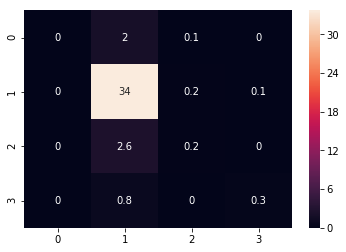

In [61]:
sns.heatmap(mean_cm["RF"],annot=True)
plt.show()

## Logistic Regression

In [62]:
start_time = time.time()

In [63]:
# Creating Model
model=LogisticRegression (solver='lbfgs', random_state=0, multi_class='multinomial', max_iter=5000)

kf = KFold(n_splits = 10, shuffle = True)

In [64]:
for i in range(10):
    
    #K-Fold Split
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    
    model = model.fit(X_train, y_train)
    
    y_predicted=model.predict(X_test)
    
    tot_acc["LR"].append(round(accuracy_score(y_test, y_predicted)*100,4))
    
    cm=confusion_matrix (y_test, y_predicted)
    shape = np.shape(cm)
    padded_array = np.zeros((4, 4))
    padded_array[:shape[0],:shape[1]] = cm
    tot_cm["LR"].append(padded_array)
    
    prf = precision_recall_fscore_support(y_test, y_predicted, average='micro')

    tot_prec["LR"].append(round(prf[0],4))
    tot_rec["LR"].append(round(prf[1],4))
    tot_F["LR"].append(round(prf[2],4))

mean_acc["LR"]=sum(tot_acc["LR"])/len(tot_acc["LR"])
mean_cm["LR"]=sum(tot_cm["LR"])/len(tot_cm["LR"])

mean_prec["LR"]=sum(tot_prec["LR"])/len(tot_prec["LR"])
mean_rec["LR"]=sum(tot_rec["LR"])/len(tot_rec["LR"])
mean_F["LR"]=sum(tot_F["LR"])/len(tot_F["LR"])

In [65]:
time_dict["LR"] = str(time.time() - start_time) + " seconds"

In [66]:
print('Accuracy from each Iteration: ', tot_acc["LR"])
print('\nAverage K-Fold Accuracy :' , mean_acc["LR"])

print('\nPrecision from each Iteration: ', tot_prec["LR"])
print('\nAverage K-Fold Precision :' , mean_prec["LR"])

print('\nRecall from each Iteration: ', tot_rec["LR"])
print('Average K-Fold Recall :' , mean_rec["LR"])

print('\nF_Score from each Iteration: ', tot_F["LR"])
print('\nAverage K-Fold F_Score :' , mean_F["LR"])

Accuracy from each Iteration:  [80.0, 85.0, 80.0, 85.0, 92.5, 87.5, 87.5, 82.5, 85.0, 90.0]

Average K-Fold Accuracy : 85.5

Precision from each Iteration:  [0.8, 0.85, 0.8, 0.85, 0.925, 0.875, 0.875, 0.825, 0.85, 0.9]

Average K-Fold Precision : 0.8550000000000001

Recall from each Iteration:  [0.8, 0.85, 0.8, 0.85, 0.925, 0.875, 0.875, 0.825, 0.85, 0.9]
Average K-Fold Recall : 0.8550000000000001

F_Score from each Iteration:  [0.8, 0.85, 0.8, 0.85, 0.925, 0.875, 0.875, 0.825, 0.85, 0.9]

Average K-Fold F_Score : 0.8550000000000001


In [67]:
print('Confusion Matrix from each Iteration: ', *tot_cm["LR"],sep='\n\n')

Confusion Matrix from each Iteration: 

[[ 0.  2.  0.  0.]
 [ 0. 32.  0.  1.]
 [ 0.  3.  0.  0.]
 [ 0.  2.  0.  0.]]

[[ 0.  3.  0.  0.]
 [ 0. 34.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  1.  0.  0.]]

[[ 0.  1.  0.  0.]
 [ 0. 32.  0.  1.]
 [ 0.  4.  0.  0.]
 [ 0.  2.  0.  0.]]

[[ 0.  1.  0.  0.]
 [ 0. 34.  2.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  0.  0.  0.]]

[[37.  1.  1.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 35.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 35.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  1.  1.  0.]]

[[ 0.  4.  0.  0.]
 [ 0. 33.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  1.  0.]]

[[ 0.  3.  0.  0.]
 [ 0. 34.  0.  1.]
 [ 0.  1.  0.  1.]
 [ 0.  0.  0.  0.]]

[[36.  0.  0.  0.]
 [ 4.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]


In [68]:
print('Average Confusion Matrix :\n' , mean_cm["LR"])

Average Confusion Matrix :
 [[ 7.3  1.9  0.1  0. ]
 [ 0.5 26.9  0.2  0.3]
 [ 0.   1.9  0.   0.1]
 [ 0.   0.6  0.2  0. ]]


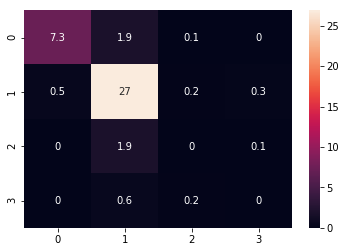

In [69]:
sns.heatmap(mean_cm["LR"],annot=True)
plt.show()

## k-Nearest Neighbours

In [70]:
start_time = time.time()

In [71]:
# Creating Model
classifier = KNeighborsClassifier(n_neighbors=15)
kf = KFold(n_splits = 10, shuffle = True)

In [72]:
for i in range(10):
    
    #K-Fold Split
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    
    classifier = classifier.fit(X_train, y_train)
    
    y_predicted=classifier.predict(X_test)
    
    tot_acc["kNN"].append(round(accuracy_score(y_test, y_predicted)*100,4))
    
    cm=confusion_matrix (y_test, y_predicted)
    shape = np.shape(cm)
    padded_array = np.zeros((4, 4))
    padded_array[:shape[0],:shape[1]] = cm
    tot_cm["kNN"].append(padded_array)
    
    prf = precision_recall_fscore_support(y_test, y_predicted, average='micro')
    
    tot_prec["kNN"].append(round(prf[0],4))
    tot_rec["kNN"].append(round(prf[1],4))
    tot_F["kNN"].append(round(prf[2],4))

mean_acc["kNN"]=sum(tot_acc["kNN"])/len(tot_acc["kNN"])
mean_cm["kNN"]=sum(tot_cm["kNN"])/len(tot_cm["kNN"])
    
mean_prec["kNN"]=sum(tot_prec["kNN"])/len(tot_prec["kNN"])
mean_rec["kNN"]=sum(tot_rec["kNN"])/len(tot_rec["kNN"])
mean_F["kNN"]=sum(tot_F["kNN"])/len(tot_F["kNN"])

In [73]:
time_dict["kNN"] = str(time.time() - start_time) + " seconds"

In [74]:
print('Accuracy from each Iteration: ', tot_acc["kNN"])
print('\nAverage K-Fold Accuracy :' , mean_acc["kNN"])

print('\nPrecision from each Iteration: ', tot_prec["kNN"])
print('\nAverage K-Fold Precision :' , mean_prec["kNN"])

print('\nRecall from each Iteration: ', tot_rec["kNN"])
print('\nAverage K-Fold Recall :' , mean_rec["kNN"])

print('\nF_Score from each Iteration: ', tot_F["kNN"])
print('\nAverage K-Fold F_Score :' , mean_F["kNN"])

Accuracy from each Iteration:  [77.5, 82.5, 85.0, 82.5, 92.5, 92.5, 85.0, 85.0, 87.5, 82.5]

Average K-Fold Accuracy : 85.25

Precision from each Iteration:  [0.775, 0.825, 0.85, 0.825, 0.925, 0.925, 0.85, 0.85, 0.875, 0.825]

Average K-Fold Precision : 0.8524999999999998

Recall from each Iteration:  [0.775, 0.825, 0.85, 0.825, 0.925, 0.925, 0.85, 0.85, 0.875, 0.825]

Average K-Fold Recall : 0.8524999999999998

F_Score from each Iteration:  [0.775, 0.825, 0.85, 0.825, 0.925, 0.925, 0.85, 0.85, 0.875, 0.825]

Average K-Fold F_Score : 0.8524999999999998


In [75]:
print('Confusion Matrix from each Iteration: ', *tot_cm["kNN"],sep='\n\n')

Confusion Matrix from each Iteration: 

[[ 0.  3.  0.  0.]
 [ 0. 31.  0.  0.]
 [ 0.  4.  0.  0.]
 [ 0.  2.  0.  0.]]

[[ 0.  4.  0.  0.]
 [ 0. 33.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  1.  0.  0.]]

[[ 0.  3.  0.  0.]
 [ 0. 34.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  4.  0.  0.]
 [ 0. 33.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  1.  0.  0.]]

[[37.  0.  0.  0.]
 [ 2.  0.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 37.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  1.  0.  0.]
 [ 0. 34.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  2.  0.  0.]]

[[ 0.  2.  0.  0.]
 [ 0. 34.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  1.  0.  0.]]

[[ 0.  3.  0.  0.]
 [ 0. 35.  0.  0.]
 [ 0.  2.  0.  0.]
 [ 0.  0.  0.  0.]]

[[ 0.  3.  0.  0.]
 [ 0. 33.  0.  0.]
 [ 0.  3.  0.  0.]
 [ 0.  1.  0.  0.]]


In [76]:
print('Average Confusion Matrix :\n' , mean_cm["kNN"])

Average Confusion Matrix :
 [[ 3.7  2.5  0.   0. ]
 [ 0.2 30.4  0.   0. ]
 [ 0.1  2.3  0.   0. ]
 [ 0.   0.8  0.   0. ]]


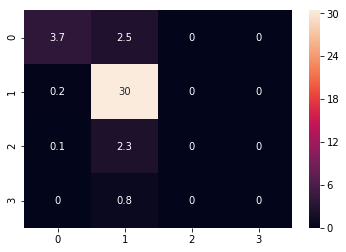

In [77]:
sns.heatmap(mean_cm["kNN"],annot=True)
plt.show()

In [78]:
print('Class labels known to the classifier--', classifier.classes_)

Class labels known to the classifier-- [0 1 2 3]


# Results

In [79]:
print("Accuracy for all iterations of k-fold method for each classification method=\n")
tot_acc

Accuracy for all iterations of k-fold method for each classification method=



{'DT': [62.5, 80.0, 70.0, 80.0, 72.5, 75.0, 80.0, 70.0, 70.0, 90.0],
 'NB': [75.0, 72.5, 85.0, 85.0, 77.5, 85.0, 82.5, 70.0, 80.0, 85.0],
 'RF': [85.0, 82.5, 82.5, 95.0, 92.5, 80.0, 87.5, 85.0, 80.0, 85.0],
 'LR': [80.0, 85.0, 80.0, 85.0, 92.5, 87.5, 87.5, 82.5, 85.0, 90.0],
 'kNN': [77.5, 82.5, 85.0, 82.5, 92.5, 92.5, 85.0, 85.0, 87.5, 82.5]}

In [80]:
print("Mean Accuracy of k-fold method for each classification method=\n")
mean_acc

Mean Accuracy of k-fold method for each classification method=



{'DT': 75.0, 'NB': 79.75, 'RF': 85.5, 'LR': 85.5, 'kNN': 85.25}

In [81]:
print("Precision for all iterations of k-fold method for each classification method=\n")
tot_prec

Precision for all iterations of k-fold method for each classification method=



{'DT': [0.625, 0.8, 0.7, 0.8, 0.725, 0.75, 0.8, 0.7, 0.7, 0.9],
 'NB': [0.75, 0.725, 0.85, 0.85, 0.775, 0.85, 0.825, 0.7, 0.8, 0.85],
 'RF': [0.85, 0.825, 0.825, 0.95, 0.925, 0.8, 0.875, 0.85, 0.8, 0.85],
 'LR': [0.8, 0.85, 0.8, 0.85, 0.925, 0.875, 0.875, 0.825, 0.85, 0.9],
 'kNN': [0.775, 0.825, 0.85, 0.825, 0.925, 0.925, 0.85, 0.85, 0.875, 0.825]}

In [82]:
print("Mean Precision of k-fold method for each classification method=\n")
mean_prec

Mean Precision of k-fold method for each classification method=



{'DT': 0.7500000000000001,
 'NB': 0.7975,
 'RF': 0.8549999999999999,
 'LR': 0.8550000000000001,
 'kNN': 0.8524999999999998}

In [83]:
print("Recall for all iterations of k-fold method for each classification method=\n")
tot_rec

Recall for all iterations of k-fold method for each classification method=



{'DT': [0.625, 0.8, 0.7, 0.8, 0.725, 0.75, 0.8, 0.7, 0.7, 0.9],
 'NB': [0.75, 0.725, 0.85, 0.85, 0.775, 0.85, 0.825, 0.7, 0.8, 0.85],
 'RF': [0.85, 0.825, 0.825, 0.95, 0.925, 0.8, 0.875, 0.85, 0.8, 0.85],
 'LR': [0.8, 0.85, 0.8, 0.85, 0.925, 0.875, 0.875, 0.825, 0.85, 0.9],
 'kNN': [0.775, 0.825, 0.85, 0.825, 0.925, 0.925, 0.85, 0.85, 0.875, 0.825]}

In [84]:
print("Mean Recall of k-fold method for each classification method=\n")
mean_rec

Mean Recall of k-fold method for each classification method=



{'DT': 0.7500000000000001,
 'NB': 0.7975,
 'RF': 0.8549999999999999,
 'LR': 0.8550000000000001,
 'kNN': 0.8524999999999998}

In [85]:
print("F-score for all iterations of k-fold method for each classification method=\n")
tot_F

F-score for all iterations of k-fold method for each classification method=



{'DT': [0.625, 0.8, 0.7, 0.8, 0.725, 0.75, 0.8, 0.7, 0.7, 0.9],
 'NB': [0.75, 0.725, 0.85, 0.85, 0.775, 0.85, 0.825, 0.7, 0.8, 0.85],
 'RF': [0.85, 0.825, 0.825, 0.95, 0.925, 0.8, 0.875, 0.85, 0.8, 0.85],
 'LR': [0.8, 0.85, 0.8, 0.85, 0.925, 0.875, 0.875, 0.825, 0.85, 0.9],
 'kNN': [0.775, 0.825, 0.85, 0.825, 0.925, 0.925, 0.85, 0.85, 0.875, 0.825]}

In [86]:
print("Mean F-score of k-fold method for each classification method=\n")
mean_F

Mean F-score of k-fold method for each classification method=



{'DT': 0.7500000000000001,
 'NB': 0.7975,
 'RF': 0.8549999999999999,
 'LR': 0.8550000000000001,
 'kNN': 0.8524999999999998}

In [87]:
print("Time taken for each classification method=\n")
time_dict

Time taken for each classification method=



{'DT': '0.09531807899475098 seconds',
 'NB': '0.09460186958312988 seconds',
 'RF': '0.775393009185791 seconds',
 'LR': '3.7190678119659424 seconds',
 'kNN': '0.09261870384216309 seconds'}

# INPUT

In [88]:
diet

{0: 'Low', 1: 'Safe', 2: 'Caution', 3: 'Danger'}

In [89]:
Model = RandomForestClassifier(random_state=0,n_estimators=50,criterion='entropy')
Model = Model.fit(X, y)

In [90]:
bu_input = input("Enter Blood Urea in mgs/dl = ")
hemo_input = input("Enter Hemoglobin in gms = ")
pcv_input = input("Enter Packed Cell Volume in % = ")
rbcc_input = input("Enter Red Blood Cell Count in millions/cmm = ")
sc_input = input("Enter Serum Creatinine(numerical) in mgs/dl = ")

Enter Blood Urea in mgs/dl = 32
Enter Hemoglobin in gms = 14
Enter Packed Cell Volume in % = 42
Enter Red Blood Cell Count in millions/cmm = 1.6
Enter Serum Creatinine(numerical) in mgs/dl = 13.6


In [91]:
#X_input=[[32,14,42,1.6,13.6]]
X_input = [[bu_input,hemo_input,pcv_input,rbcc_input, sc_input]]
y_pred_input=Model.predict(X_input)

In [92]:
if int(y_pred_input)==0:
    statement="Patient has potassium deficiency. Should eat more foods rich in potassium, such as fruits and vegetables"
elif int(y_pred_input)==1:
    statement="Patient's potassium level is normal. No change in diet plan required."
elif int(y_pred_input)==2:
    statement="Patient's potassium level is high. Limit foods that are high in potassium like milk, fruits and vegetables."
else:
    statement="Patient's potassium level is dangerously high. Need to limit foods that are high in potassium. Patient might need dialysis and medication."

In [93]:
print("Patient is in ",diet[int(y_pred_input)]," zone.")
print(statement)

Patient is in  Safe  zone.
Patient's potassium level is normal. No change in diet plan required.


# END

In [94]:
print("--- %s seconds ---" % (time.time() - start_code))

--- 30.64826202392578 seconds ---
